# MLE and Hypothesis Testing

### Read the given csv file [```q4.csv```](https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4.csv) of samples. Assume that it is drawn from a exponential distribution. What is the difference of log likelihoods for $\lambda = 1$ and $\lambda = 2$ ? Which of the two is more strongly supported?

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
url = 'https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4.csv'
data = pd.read_csv(url,header=None)

# PDF of exponential distribution is $\lambda e^{-\lambda x}$
Define a function to find pdf. You can use any module to get pre-defined functions also. And then find the likelihood and log-likelihood

In [3]:
def pdf(x,Lambda):
  y = np.exp(-1 * Lambda * x) * Lambda
  return y

y1 = pdf(data[1],1)
likelihood1 = np.prod(y1)
loglikelihood1 = np.log(likelihood1)

y2 = pdf(data[1],2)
likelihood2 = np.prod(y2)
loglikelihood2 = np.log(likelihood2)

print("\u03BB = 1 \n-------------------")
print("Likelihood=", likelihood1, "\nLog-likelihood=", loglikelihood1)

print("\n\u03BB = 2 \n-------------------")
print("Likelihood=", likelihood2, "\nLog-likelihood=", loglikelihood2)


print()
print("Difference of Log-likelihood=", loglikelihood2 - loglikelihood1)
print()
print("Exponential distribution with \u03BB = 2 is strongly supported because")
print("1. Has more likelihood than \u03BB = 1")
print("2. \u03BC = 1/\u03BB = 0.5 is more near to expected value of actual sample distribution")

λ = 1 
-------------------
Likelihood= 5.52106601597132e-22 
Log-likelihood= -48.94830108538966

λ = 2 
-------------------
Likelihood= 3.864074103681613e-13 
Log-likelihood= -28.581884114784785

Difference of Log-likelihood= 20.366416970604874

Exponential distribution with λ = 2 is strongly supported because
1. Has more likelihood than λ = 1
2. μ = 1/λ = 0.5 is more near to expected value of actual sample distribution


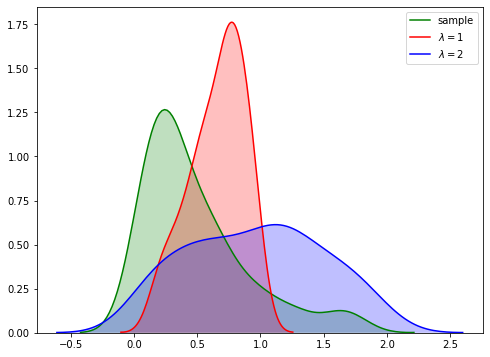

In [4]:
plt.figure(figsize=(8,6))

sns.kdeplot(data[1], shade = True, color = "g", label = "sample")
sns.kdeplot(y1, shade = True, color = "r", label = '$\lambda = 1$')
sns.kdeplot(y2, shade = True, color = "b", label = "$\lambda = 2$")


### Read the csv files [```q4_1.csv```](https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4_1.csv) and [```q4_2.csv```](https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4_2.csv) to get samples from two unknown distributions. Choose a significance level and implement the the most general two-sample t-test

In [0]:
sample1 = pd.read_csv('https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4_1.csv',header=None)
sample2 = pd.read_csv('https://raw.githubusercontent.com/Ipsit1234/SHALA/master/q4_2.csv',header=None)

Find the parameters required to compute the T statistic

In [6]:
n1 = len(sample1[1])
n2 = len(sample2[1])

mean1 = np.mean(sample1[1])
mean2 = np.mean(sample2[1])

var1 = np.var(sample1[1])
var2 = np.var(sample2[1])

sd1 = np.std(sample1[1])
sd2 = np.std(sample2[1])

print("# of sample1=",n1,"\n# of sample2=",n2,"\nmean1=",mean1,"\nmean2=",mean2,"\nvar1=",var1,"\nvar2=",var2)
print("\nnumber of samples are different")
print("sd1/sd2=", sd1/sd2)

# of sample1= 100 
# of sample2= 50 
mean1= 0.04564650656645692 
mean2= 0.5007107003796978 
var1= 0.051531022851777415 
var2= 0.010358345133164965

number of samples are different
sd1/sd2= 2.230433055576444


Find the degrees of freedom to get the critical value

In [0]:
dof = ((var1/n1 + var2/n2)**2) / (((var1/n1)**2)/(n1-1) + ((var2/n2)**2)/(n2-1))

Compare the critical value and the T statistic and conclude whether null hypothesis is accepted or not. Print 'YES' is it is rejected, otherwise print 'NO'.

In [8]:
T = (mean1 - mean2) / ((var1/n1 + var2/n2)**0.5)
significance = 0.05
# t distribution
critical_val = stats.t.pdf((1 - significance/2), dof)
print("T=", T,"\nCritical value=",critical_val)

if np.abs(T) <= critical_val:
  print("NO")
else:
  print("YES")

T= -16.930142459567165 
Critical value= 0.2471768028995604
YES


Plot the distribution of both the samples to visualize

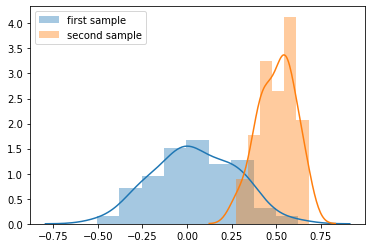

In [9]:
sns.distplot(sample1[1].values)

sns.distplot(sample2[1].values)
plt.legend(['first sample','second sample'])
plt.show()